#         IST652 - Scripting for Data Analysis

##      FINAL PROJECT - COVID19 DATA ANALYSIS

In [1]:
#Importing the necessary libraries

In [5]:
# Libraries for handling dataframes
import numpy as np
import pandas as pd

In [6]:
# library for math functions
import math
# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Library for regression analysis
import statsmodels.api as sm

In [14]:
#Reading the Covid19 CSV dataset into a pandas dataframe
C19_df = pd.read_csv('Covid_Data.csv')

In [15]:
#Inspecting the dataset
C19_df.info()
C19_df
#The dataset has 6625 rows and 39 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6625 entries, 0 to 6624
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      6625 non-null   int64  
 1   state                     6625 non-null   object 
 2   positive                  6610 non-null   float64
 3   negative                  6425 non-null   float64
 4   pending                   950 non-null    float64
 5   hospitalizedCurrently     3887 non-null   float64
 6   hospitalizedCumulative    3342 non-null   float64
 7   inIcuCurrently            2040 non-null   float64
 8   inIcuCumulative           873 non-null    float64
 9   onVentilatorCurrently     1813 non-null   float64
 10  onVentilatorCumulative    306 non-null    float64
 11  recovered                 3651 non-null   float64
 12  dataQualityGrade          5524 non-null   object 
 13  lastUpdateEt              6270 non-null   object 
 14  dateModi

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200701,AK,978.0,113422.0,NaN,20.0,NaN,NaN,NaN,2.0,...,114400,0,0,f0f40f098f8b16e361b15186d937fa2a340c9789,0,0,0,0,0,NaN
1,20200701,AL,38962.0,374991.0,NaN,797.0,2803.0,NaN,814.0,NaN,...,413953,22,34,1c79b924f9ce2a8b4cd10808f09ca63bd36816c7,0,0,0,0,0,NaN
2,20200701,AR,21197.0,293661.0,NaN,275.0,1448.0,NaN,NaN,72.0,...,314858,7,35,cfd94f15c421ac45cb3d3250f464e5cd2ac83d88,0,0,0,0,0,NaN
3,20200701,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,...,696,0,0,8dcc955b0aad370697dcee1831cad34e8f150662,0,0,0,0,0,NaN
4,20200701,AZ,84092.0,465504.0,NaN,2876.0,4837.0,675.0,NaN,466.0,...,549596,88,101,7fbca75f0f8c31c1456204b232f552909adf3666,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,20200126,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,760c3dc0f1be8778f30b6d200547f3b5ac745758,0,0,0,0,0,NaN
6621,20200125,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,8c8515283dd7f193d5ec506f4d6ef8334bc50770,0,0,0,0,0,NaN
6622,20200124,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,01659896e63df6a3a877a4c826167fe0e44cb8a8,0,0,0,0,0,NaN
6623,20200123,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,b8c2a13e67216abb871b61007e5a22ff3828a041,0,0,0,0,0,NaN


In [16]:
# Columns pending, inIcuCurrently, inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,totalTestsViral,positiveTestsViral,
# negativeTestsViral,positiveCasesViral,grade have more than 60% null values and are also not insightful for our analysis.

# Columns posNeg, fips,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score are irrelavant and thus not used for our analysis

# Therefore we have decided to drop these columns from the dataframe

C19_df.drop(columns = C19_df.columns[[4,5,6,7,8,9,10,13,14,15,17,18,19,20,21,22,23,26,29,32,33,34,35,36,37,38]], axis = 1, inplace = True)

In [19]:
# Dropping the last set of rows where the data is not consistant and considering
# data from April 2020 to July 2020.
C19_df.drop(C19_df[C19_df['date'] < 20200400].index, inplace = True)
#Dropping data for AS and PR as more missing values and low data quality grade
C19_df.drop(C19_df[C19_df['state'] == 'AS'].index, inplace = True)
C19_df.drop(C19_df[C19_df['state'] == 'PR'].index, inplace = True)
#Dropping union territories
C19_df.drop(C19_df[C19_df['state'] == 'VI'].index, inplace = True)
C19_df.drop(C19_df[C19_df['state'] == 'MP'].index, inplace = True)
C19_df.drop(C19_df[C19_df['state'] == 'GU'].index, inplace = True)

In [23]:
C19_df.isnull().sum()

date                        0
state                       0
positive                    0
negative                    0
recovered                   0
dataQualityGrade            0
death                       0
positiveIncrease            0
negativeIncrease            0
totalTestResults            0
totalTestResultsIncrease    0
deathIncrease               0
hospitalizedIncrease        0
dtype: int64

In [123]:
C19_df[C19_df.negative.isnull()]

,date,state,positive,negative,recovered,dataQualityGrade,death,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
5123,20200401,MP,6.0,NaN,NaN,NaN,0.0,4,0,6,4,0,0


In [22]:
#Since the number of deaths during the initial days is negligle for our analysis as the number of tests is low, 
#we replace these missing values with 0's 
C19_df['death']=C19_df['death'].fillna(0)
C19_df['negative']=C19_df['negative'].fillna(0)
#Recovered column has about 25% NaS and cannot be imputed with other values. So we replace the missing values with 0's
C19_df['recovered'] = C19_df['recovered'].fillna(0)
C19_df['dataQualityGrade'] = C19_df['dataQualityGrade'].fillna('Unknown')

In [24]:
#Converting date into datetime format
C19_df['date'] = pd.to_datetime(C19_df['date'], format='%Y%m%d')

In [25]:
C19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4692 entries, 0 to 5151
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      4692 non-null   datetime64[ns]
 1   state                     4692 non-null   object        
 2   positive                  4692 non-null   float64       
 3   negative                  4692 non-null   float64       
 4   recovered                 4692 non-null   float64       
 5   dataQualityGrade          4692 non-null   object        
 6   death                     4692 non-null   float64       
 7   positiveIncrease          4692 non-null   int64         
 8   negativeIncrease          4692 non-null   int64         
 9   totalTestResults          4692 non-null   int64         
 10  totalTestResultsIncrease  4692 non-null   int64         
 11  deathIncrease             4692 non-null   int64         
 12  hospitalizedIncrease

In [26]:
#Resetting the index as we have dropped multiple rows
C19_df = C19_df.reset_index(drop=True)

In [28]:
#Creating a dataset with cumilative data for the 52 states. 
istop = C19_df['date'] == '2020-07-01'
StateCovid = C19_df[istop]

In [50]:
#Reading the state demographics data and merging it with out StateCovid Data.
State_data = pd.read_csv('State_Data.csv')

In [52]:
State_data.drop(State_data.columns[len(State_data.columns)-1], axis=1, inplace=True)
State_data.head(5)

,state_name,state,Under18_Population,Total_Population,Area (sq. mi),UrbanPopulation%
0,Alabama,AL,1111481,4833722,52423,59.0
1,Alaska,AK,188132,735132,656425,66.0
2,Arizona,AZ,1616814,6626624,114006,89.8
3,Arkansas,AR,709866,2959373,53182,56.2
4,California,CA,9174877,38332521,163707,95.0


In [33]:
StateCovid.head(5)

,date,state,positive,negative,recovered,dataQualityGrade,death,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,2020-07-01,AK,978.0,113422.0,528.0,A,14.0,38,2177,114400,2215,0,0
1,2020-07-01,AL,38962.0,374991.0,18866.0,B,972.0,917,6384,413953,7301,22,34
2,2020-07-01,AR,21197.0,293661.0,15163.0,A,277.0,420,3235,314858,3655,7,35
3,2020-07-01,AZ,84092.0,465504.0,9715.0,A+,1720.0,4877,12363,549596,17240,88,101
4,2020-07-01,CA,232657.0,4021519.0,0.0,B,6090.0,9740,77297,4254176,87037,110,0


In [53]:
# Merging the state corona virus and state dataset by "state" for analysis
merged_df = pd.merge(StateCovid,State_data,on = "state")
# Constructing 2 new columns to calculate Death ratio and Recovered Ratio for analysis 
merged_df['Death_ratio'] = merged_df['death']/merged_df['positive']
merged_df['Recovered_ratio'] = merged_df['recovered']/merged_df['positive']

In [54]:
merged_df['Population_density'] = merged_df['Total_Population']/merged_df['Area (sq. mi)']
merged_df.head(5)

,date,state,positive,negative,recovered,dataQualityGrade,death,positiveIncrease,negativeIncrease,totalTestResults,...,deathIncrease,hospitalizedIncrease,state_name,Under18_Population,Total_Population,Area (sq. mi),UrbanPopulation%,Death_ratio,Recovered_ratio,Population_density
0,2020-07-01,AK,978.0,113422.0,528.0,A,14.0,38,2177,114400,...,0,0,Alaska,188132,735132,656425,66.0,0.014315,0.539877,1.119903
1,2020-07-01,AL,38962.0,374991.0,18866.0,B,972.0,917,6384,413953,...,22,34,Alabama,1111481,4833722,52423,59.0,0.024947,0.484215,92.206131
2,2020-07-01,AR,21197.0,293661.0,15163.0,A,277.0,420,3235,314858,...,7,35,Arkansas,709866,2959373,53182,56.2,0.013068,0.715337,55.646140
3,2020-07-01,AZ,84092.0,465504.0,9715.0,A+,1720.0,4877,12363,549596,...,88,101,Arizona,1616814,6626624,114006,89.8,0.020454,0.115528,58.125221
4,2020-07-01,CA,232657.0,4021519.0,0.0,B,6090.0,9740,77297,4254176,...,110,0,California,9174877,38332521,163707,95.0,0.026176,0.000000,234.153219


# US States visualization of COVID19 positive cases and population

In [112]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(merged_df,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="positive",  # DataFrame column with color values
                    hover_name="state_name", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'US States Covid19 Positive Cases Distribution', # Creating a Title
    geo_scope='usa',  # Plot only the USA
)
fig.show()  # Output the plot to the screen

In [116]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(merged_df,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="Total_Population",  # DataFrame column with color values
                    hover_name="state_name", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'US States Population Distribution', # Creating a Title
    geo_scope='usa',  # Plot only the USA
)
fig.show()  # Output the plot to the screen

# #Analysis 1 – How each State’s total population and Urban Population affects the confirmed cases to death ratio and confirmed cases to recovery ratio

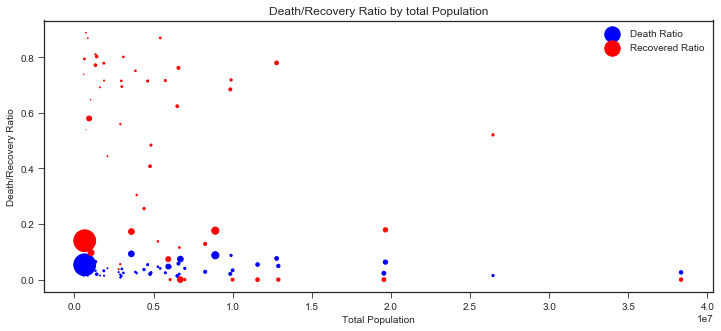

In [55]:
# Plotting how "POPULATION" affects "Death_ratio" and "Recovered_ratio"
# Setting the plot elements to plot the data
plt.figure(figsize = (12,5))
plt.style.use('seaborn-ticks')
plt.title("Death/Recovery Ratio by total Population") 
plt.xlabel("Total Population") 
plt.ylabel("Death/Recovery Ratio")

# Generating a scatter plot to visualize how "Death_ratio" and "Recovery_ratio" change with "Population" 
# and the size of the scatter point depicts the "Population Density" of the 
plt.scatter(merged_df["Total_Population"], merged_df["Death_ratio"],s=merged_df["Population_density"]/20,color = 'blue',marker = 'o', label = 'Death Ratio')
plt.scatter(merged_df["Total_Population"], merged_df["Recovered_ratio"],s=merged_df["Population_density"]/20,color = 'red',marker = 'o', label = 'Recovered Ratio')

# To show the grapgh and legend
plt.legend()
plt.show()

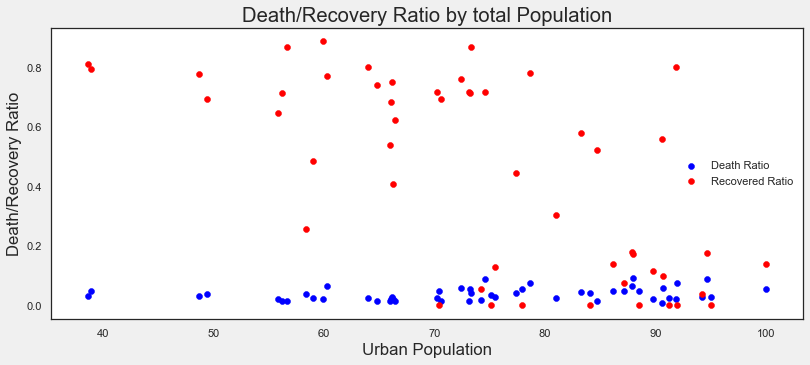

In [122]:
# Plotting how "Urban POPULATION under 18" affects "Death_ratio" and "Recovered_ratio"
# Setting the plot elements to plot the data
plt.figure(figsize = (12,5))
plt.style.use('seaborn-ticks')
plt.title("Death/Recovery Ratio by total Population") 
plt.xlabel("Urban Population") 
plt.ylabel("Death/Recovery Ratio")

# Generating a scatter plot to visualize how "Death_ratio" and "Recovery_ratio" change with "Urban Population" 
# and the size of the scatter point depicts the "Population Density" of the 
plt.scatter(merged_df["UrbanPopulation%"], merged_df["Death_ratio"],color = 'blue',marker = 'o', label = 'Death Ratio')
plt.scatter(merged_df["UrbanPopulation%"], merged_df["Recovered_ratio"],color = 'red',marker = 'o', label = 'Recovered Ratio')

# To show the grapgh and legend
plt.legend()
plt.show()

# #Analysis 2 - Time series for growth of corona virus in top three states

In [88]:
# Finding top 5 states with most confirmed and storing it in the dataframe "top_3" 
top_5 = merged_df.sort_values(by=['positive']).tail(5)
top_5
# 1. New York
# 2. california
# 3. New Jersey

,date,state,positive,negative,recovered,dataQualityGrade,death,positiveIncrease,negativeIncrease,totalTestResults,...,deathIncrease,hospitalizedIncrease,state_name,Under18_Population,Total_Population,Area (sq. mi),UrbanPopulation%,Death_ratio,Recovered_ratio,Population_density
9,2020-07-01,FL,158997.0,1821357.0,0.0,A,3650.0,6563,28796,1980354,...,46,246,Florida,4026674,19552860,65758,91.2,0.022956,0.000000,297.345722
43,2020-07-01,TX,168062.0,1753886.0,87556.0,B,2481.0,8076,44590,1921948,...,57,0,Texas,7041986,26448193,268601,84.7,0.014762,0.520974,98.466473
31,2020-07-01,NJ,171928.0,1271009.0,30300.0,A+,15078.0,261,20302,1442937,...,43,207,New Jersey,2022117,8899339,8722,94.7,0.087700,0.176237,1020.332378
4,2020-07-01,CA,232657.0,4021519.0,0.0,B,6090.0,9740,77297,4254176,...,110,0,California,9174877,38332521,163707,95.0,0.026176,0.000000,234.153219
34,2020-07-01,NY,394079.0,3577569.0,70590.0,A,24866.0,625,56085,3971648,...,11,0,New York,4239976,19651127,54475,87.9,0.063099,0.179127,360.736613


In [65]:
Timedf = C19_df
Timedf = Timedf.set_index('date')

In [90]:
# Subsetting the data using the top_3 dataframe to contain only the data for the top 3 most affected states
top5_df = Timedf[Timedf.state.isin(top_5['state'])]
top5_df = top5_df.sort_values(['state', 'date'], ascending=[False, True])
top5_df.head(5)

,state,positive,negative,recovered,dataQualityGrade,death,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,
2020-04-01,TX,3997.0,43860.0,38.0,A,58.0,731,4134,47857,4865,17,0
2020-04-02,TX,4669.0,46010.0,38.0,A,70.0,672,2150,50679,2822,12,0
2020-04-03,TX,5330.0,50434.0,38.0,A,90.0,661,4424,55764,5085,20,0
2020-04-04,TX,6110.0,57641.0,38.0,A,105.0,780,7207,63751,7987,15,0
2020-04-05,TX,6812.0,64126.0,38.0,A,127.0,702,6485,70938,7187,22,0


In [74]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 10)})

In [99]:
# Setting the plot attributes to be plotted on the Y-axis
plot_attr = ['positiveIncrease','deathIncrease','hospitalizedIncrease','recovered']

NY TIME SERIES PLOT


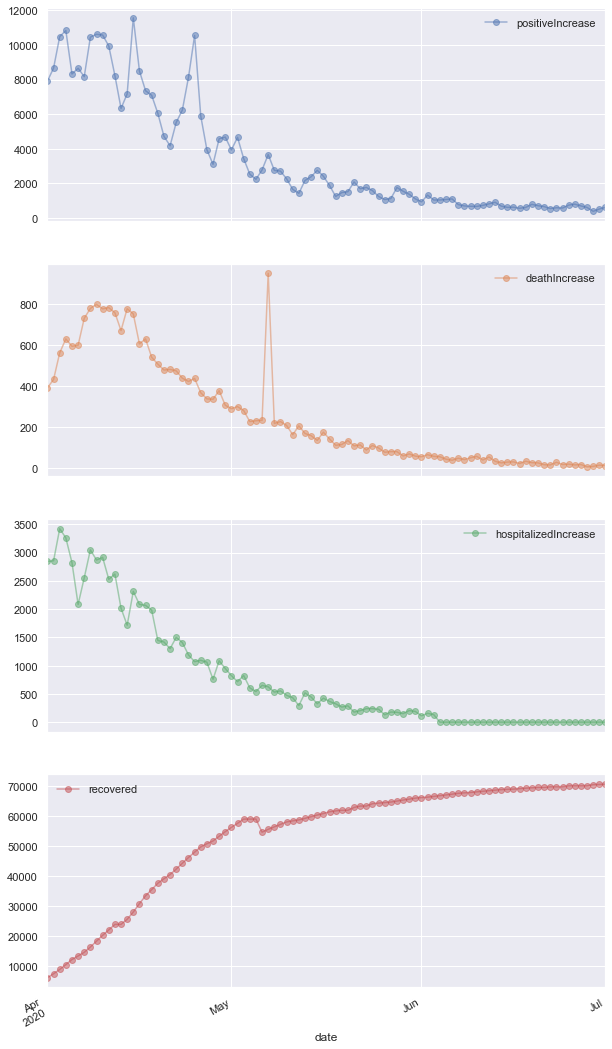

In [83]:
# New York time series plot
print("NY TIME SERIES PLOT")
# Using the matplotlib plot function to plot time-series graph for the china dataset
plot_ny = top3_df[top3_df['state']=="NY"][plot_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 20), subplots=True)

TX TIME SERIES PLOT


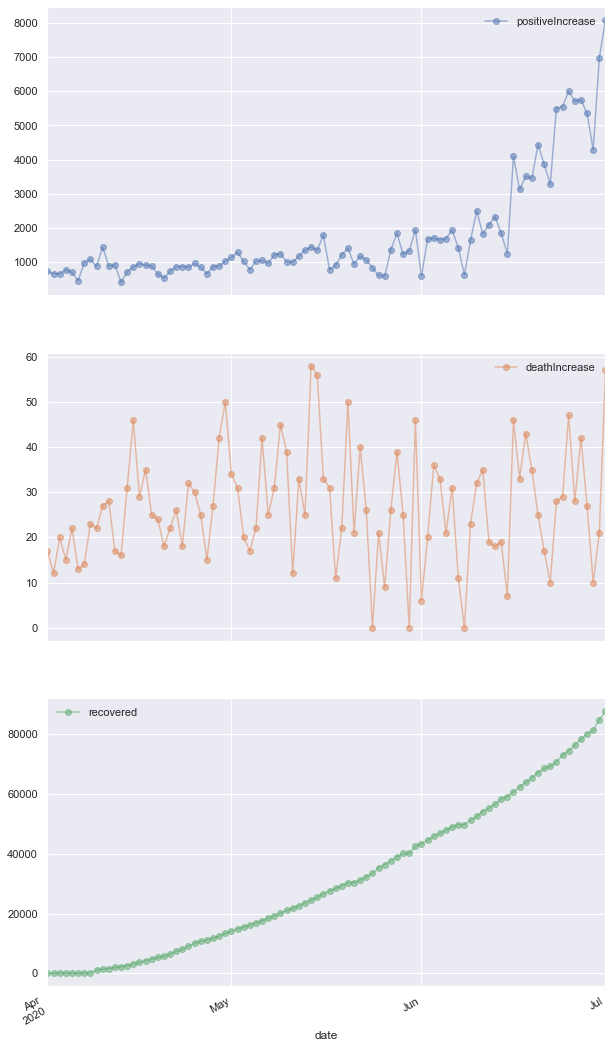

In [98]:
# Texas time series plot
print("TX TIME SERIES PLOT")
# Using the matplotlib plot function to plot time-series graph for the texas dataset
plot_tx = top5_df[top5_df['state']=="TX"][plot_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 20), subplots=True)

FL TIME SERIES PLOT


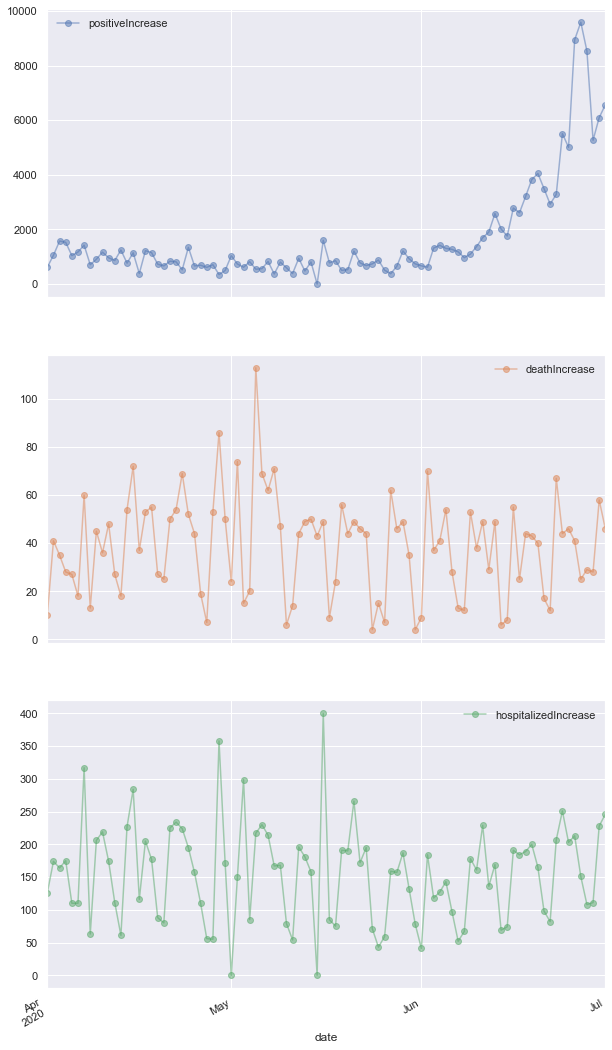

In [100]:
# Florida time series plot
print("FL TIME SERIES PLOT")
# Using the matplotlib plot function to plot time-series graph for the florida dataset
plot_fl = top5_df[top5_df['state']=="FL"][plot_attr].plot(marker='o', linestyle='-',alpha=0.5, figsize=(10, 20), subplots=True)

# #Analysis 3 - Using Regression to find the effect of various factors on the increase in number of cases in various states

In [103]:
# Detecting how the number of "Confirmed" cases are explained by the "population",'Urban Pop %' and "Med. Age"  attribute
# population + Median Age + Urban Pop
dep_var = merged_df['positive']
ind_var = merged_df[['totalTestResults','hospitalizedIncrease','Total_Population','UrbanPopulation%','Area (sq. mi)','Population_density']]
ind_var = sm.add_constant(ind_var)

model = sm.OLS(dep_var, ind_var).fit()
model.summary()
# Adjusted R-square : 0.917

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               positive   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     81.23
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           3.68e-22
Time:                        04:30:45   Log-Likelihood:                -577.97
No. Observations:                  51   AIC:                             1170.
Df Residuals:                      44   BIC:                             1183.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.908e+04   1.74e+04     -1.097      0.278   -5.41e+04     1.6e+04
totalTestResults         0.1017      0.009     11.036      0.000       0.083       0.120
hospitalizedIncrease   122.6314     59.800      2.051      0.046       2.112     243.151
Total_Population        -0.0034      0.001     -3.070      0.004      -0.006      -0.001
UrbanPopulation%       345.5719    251.701      1.373      0.177    -161.698     852.842
Area (sq. mi)           -0.0194      0.033     -0.582      0.564      -0.087       0.048
Population_density      -0.9261      2.564     -0.361      0.720      -6.094       4.242
==============================================================================
Omnibus:                       12.229   Durbin-Watson:                   2.634
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               40.103
Skew:                          -0.166   Prob(JB):                     1.96e-09
Kurtosis:                       7.331   Cond. No.                     5.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# Predicting the "Confirmed Cases" using the model generated
prediction = model.predict(ind_var)
prediction

0        102.266384
1      29846.965965
2      25388.030812
3      55173.828239
4     311149.882550
5      29593.463202
6      46842.604313
7      14616.474760
8      17368.116081
9     175198.120025
10     85621.844545
11     15800.181656
12     22766.358737
13      8371.259353
14    132347.724759
15     35947.883041
16     13606.511053
17     25163.361539
18     65695.208097
19     78034.267134
20     52270.615188
21      -742.308470
22     78677.150838
23     51928.420097
24     22664.463949
25     19152.252637
26      3866.671109
27     64499.050349
28      9018.959249
29     16595.946923
30      9008.785645
31    154036.777450
32     36305.921300
33     30597.311808
34    346182.699895
35     56314.130013
36     28409.863427
37     20282.827112
38     42038.868640
39     33551.193223
40     26297.072827
41      5311.255481
42     69865.508697
43    109396.936357
44     39411.659640
45     49601.055393
46     -1302.075207
47     45865.053353
48     47861.726178
49      8456.446129


# K-Means Clustering

In [117]:
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



In [118]:
df1 = merged_df[['positive', 'Total_Population']].copy()              #Copy the columns required for a new dataframe
df1 = merged_df.filter(['positive','Total_Population'], axis=1)

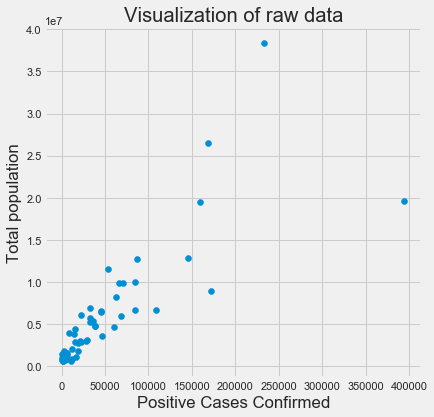

In [121]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1])
plt.xlabel('Positive Cases Confirmed')
plt.ylabel('Total population')
plt.title('Visualization of raw data');

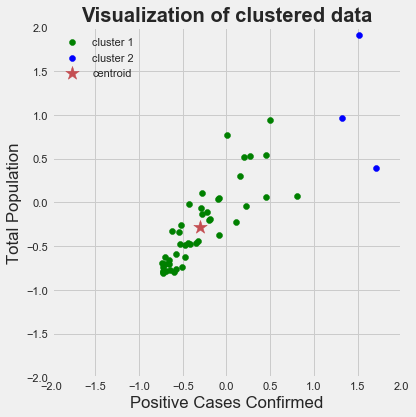

In [120]:
# Standardize the data
X_std = StandardScaler().fit_transform(df1)

# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))

#plt.scatter(X_std[:, 0], X_std[:, 1], c='green', label='cluster 1')

#plt.scatter(X_std[:, 0], X_std[:, 1], c='blue', label='cluster 2')

plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Positive Cases Confirmed')
plt.ylabel('Total Population')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');